This project is for the class of OPS802. The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [443]:
# Solve Here

import pandas as pd
import numpy as no
import matplotlib.pyplot as plt 

# Load the dataset 

# Allow us to see all  working lines.
pd.set_option('display.max_rows', 200)

filename = 'iris_not_clean.data'

# open and close - skip rows with comments
file = open(filename, 'r')
page = file.read()
file.close()

lines = page.split('\n')

dataset = []
for i in range(len(lines)):
    line = lines[i]
    if len(line) < 1:
        pass
    elif line[0] == '#':
        pass
    else:
        items = line.split('|')
        dataset.append(items)

df = pd.DataFrame(dataset)

# Change column type
for i in range(4):

    df[i] = pd.to_numeric(df[i], errors='coerce')

# Display the type of data in each column.
#print(df.dtypes)


# the number of rows and columns in dataframe

print('this is rows and columns:' , df.shape)




# Updating the 36th and 39th sample - since indexing starts at 0. Do 35 and 38 
print('36th row:', df.iloc[35])
df.loc[35, 3] = 0.2
print('UPDATED 36th row:', df.iloc[35])


print('39th row:', df.iloc[38])
df.loc[38:38] = 4.9, 3.6, 1.4, 0.1, 'iris-setosa'
print('UPDATED 39th row:', df.iloc[38])

# Set column Names

df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']


# How many nulls in the dataframe - 7 
print('this is amount of nulls', df.isnull().sum().sum())


# Which rows contains nans and how many nans in each of these rows
print('These rows have NaNs:',df[df.isnull().any(axis=1)])



# Which columns have NaNs 
print('these columns have NaNs:' , df.loc[:, :].isnull().sum())


this is rows and columns: (153, 5)
36th row: 0            4.9
1            3.1
2            1.5
3            0.1
4    Iris-setosa
Name: 35, dtype: object
UPDATED 36th row: 0            4.9
1            3.1
2            1.5
3            0.2
4    Iris-setosa
Name: 35, dtype: object
39th row: 0            4.9
1            3.1
2            1.5
3            0.1
4    Iris-setosa
Name: 38, dtype: object
UPDATED 39th row: 0            4.9
1            3.6
2            1.4
3            0.1
4    iris-setosa
Name: 38, dtype: object
this is amount of nulls 7
These rows have NaNs:     SepalLength  SepalWidth  PetalLength  PetalWidth      Species
28          5.2         3.4          NaN         0.2  Iris-setosa
29          NaN         NaN          NaN         NaN             
44          NaN         3.2          2.1         NaN             
these columns have NaNs: SepalLength    2
SepalWidth     1
PetalLength    2
PetalWidth     2
Species        0
dtype: int64


# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per class, i.e. grouped by classes

This is the variance for each column: SepalLength    0.694918
SepalWidth     0.188365
PetalLength    3.116903
PetalWidth     0.583747
dtype: float64
This is the mean for each column: SepalLength    5.833775
SepalWidth     3.060526
PetalLength    3.746358
PetalWidth     1.192715
dtype: float64


(150, 5)

This is the variance for each column: SepalLength    0.696868
SepalWidth     0.189979
PetalLength    3.119510
PetalWidth     0.581006
dtype: float64
This is the mean for each column: SepalLength    5.838000
SepalWidth     3.057333
PetalLength    3.757333
PetalWidth     1.199333
dtype: float64
Iris-setosa

(49, 4)

Iris-versicolor

(50, 4)

Iris-virginica

(50, 4)

iris-setosa

(1, 4)



,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
96,5.0,2.3,3.3,1.0,Iris-versicolor
78,6.6,3.0,4.4,1.4,Iris-versicolor
120,7.7,3.8,6.7,2.2,Iris-virginica
31,4.8,3.1,1.6,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
95,5.8,2.6,4.0,1.2,Iris-versicolor
20,5.4,3.4,1.7,0.2,Iris-setosa
100,6.2,2.9,4.3,1.3,Iris-versicolor
151,6.2,3.4,5.4,2.3,Iris-virginica
56,5.5,2.3,4.0,1.3,Iris-versicolor


Text(0.5, 1.0, 'Sepal Length')

Text(0.5, 1.0, 'Sepal Widthy')

Text(0.5, 1.0, 'Petal Length')

Text(0.5, 1.0, 'Petal Width')

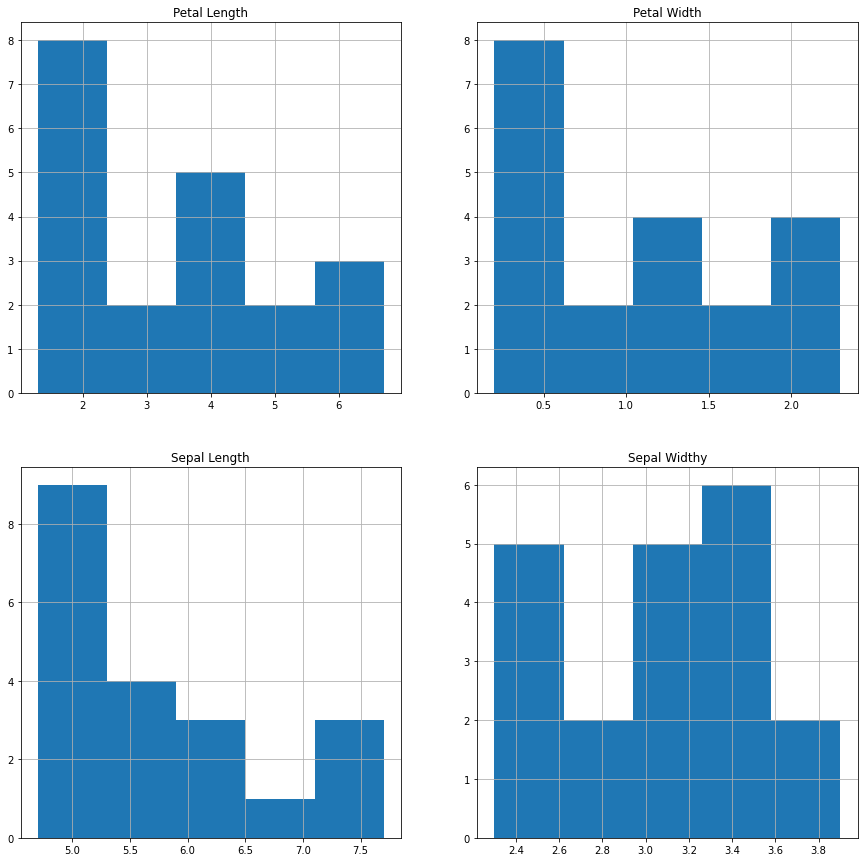

Species
Iris-setosa        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-versicolor    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-virginica     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000022B5FD7E5B0>>

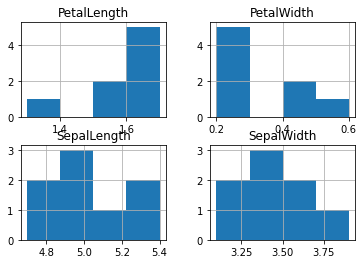

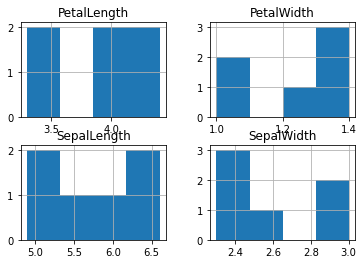

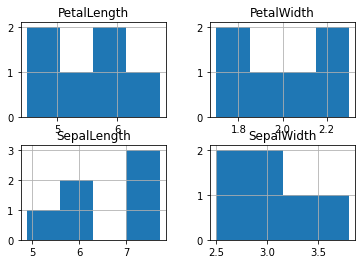

In [444]:
# Solve Here
import random  
%matplotlib inline


# mean and variance for each column

print('This is the variance for each column:' , df.var())
print('This is the mean for each column:', df.mean())


# Drop all NaN rows 
df = df.dropna(how='any')

df.shape

# Recalculate the mean and variance

print('This is the variance for each column:' , df.var())
print('This is the mean for each column:', df.mean())

# How many records exist for each class

g = df.groupby('Species')

for Species, Species_cont in g:
    print(Species)
    print()
    print(Species_cont[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].shape)
    print()
    
    
# Change the random seed to 1234 and randomly pick 20 samples of the data and display it
random.seed(30)

sample1  = df.sample(n = 20) 

sample1

# Plot histogram for all the data attributes

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(15,15));
sample1['SepalLength'].hist(ax = axes[1,0],bins=5)
sample1['SepalWidth'].hist(ax=axes[1,1],bins=5)
sample1['PetalLength'].hist(ax=axes[0,0],bins=5)
sample1['PetalWidth'].hist(ax=axes[0,1],bins=5)

# setting the title for each subplot
axes[1,0].set_title("Sepal Length",loc='center')
axes[1,1].set_title("Sepal Widthy")
axes[0,0].set_title("Petal Length")
axes[0,1].set_title("Petal Width")


plt.show();


# Plot histogram for all the data attributes per class, i.e. grouped by classes
ax1 = sample1.groupby('Species').hist(bins=4)
ax1;

h = sample1.groupby('Species').count
h

# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

[0.4  0.   0.   0.1  0.   0.25 0.05 0.05 0.1  0.05]
[1.3  1.84 2.38 2.92 3.46 4.   4.54 5.08 5.62 6.16 6.7 ]


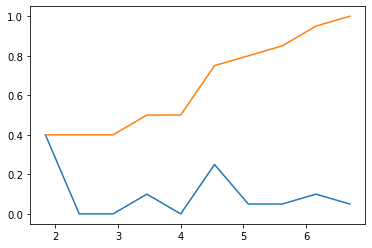

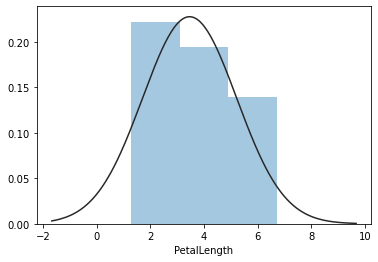

In [445]:
# Solve Here 

import numpy as np
import seaborn as sns
from scipy.stats import norm
import scipy.stats


# pdf fitting to a curve - petal length 
counts,bin_edges=np.histogram(sample1["PetalLength"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()


# Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
sns.distplot(sample1['PetalLength'], fit=norm, kde=False)


### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.5, 1.0, '2 component PCA')

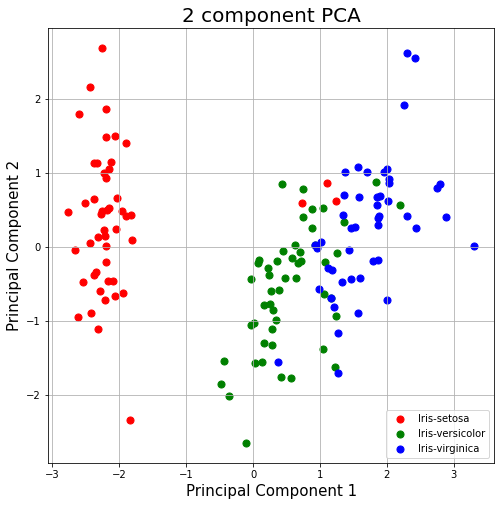

In [414]:
# Solve Here
from sklearn.decomposition import PCA

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)



from sklearn.decomposition import PCA
pca = PCA(n_components=2)


principalComponents = pca.fit_transform(x)


principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['Species']]], axis = 1)



import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [395]:
# how much information was included/lost
pca.explained_variance_ratio_


array([0.73045963, 0.22782483])

# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

KMeans(n_clusters=3)

[[-0.04340534 -0.88337647  0.34793636  0.2815273 ]
 [-1.01923175  0.85326268 -1.30506861 -1.25489349]
 [ 1.13323554  0.08842168  0.9960171   1.01752612]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


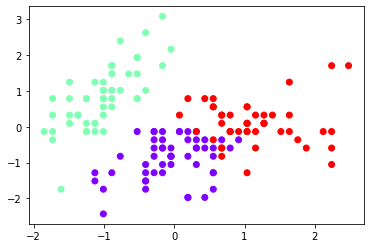

In [415]:
# Solve Here

# use K means to cluster - 3 categories 

from sklearn.cluster import KMeans
x1 = df.iloc[:, [0,1,2,3]].values
kmeans = KMeans(n_clusters=3)  
kmeans.fit(x)
print(kmeans.cluster_centers_)  
print(kmeans.labels_)  
plt.scatter(x[:,0],x[:,1], c=kmeans.labels_, cmap='rainbow')  

### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

In [430]:
# Solve Here



# split dataset into 80-20
x = finalDf.iloc[:,0:2].values
y = finalDf.iloc[:,2]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [431]:
from sklearn.preprocessing import StandardScaler 

sc=StandardScaler()

X_train=sc.fit_transform(X_train)

X_test=sc.transform(X_test)

In [433]:
# build the model


lorg=LogisticRegression(random_state=0)

lorg.fit(X_train,y_train) 

LogisticRegression(random_state=0)

In [434]:
# make predictions
Y_pred=lorg.predict(X_test)

print(Y_pred)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


In [437]:

# create a confusion matrix

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,Y_pred)

cm

array([[11,  0,  0],
       [ 0, 10,  1],
       [ 0,  2,  6]], dtype=int64)

In [441]:
# Accuracy of the model

score = accuracy_score(y_test,Y_pred)
score

0.9

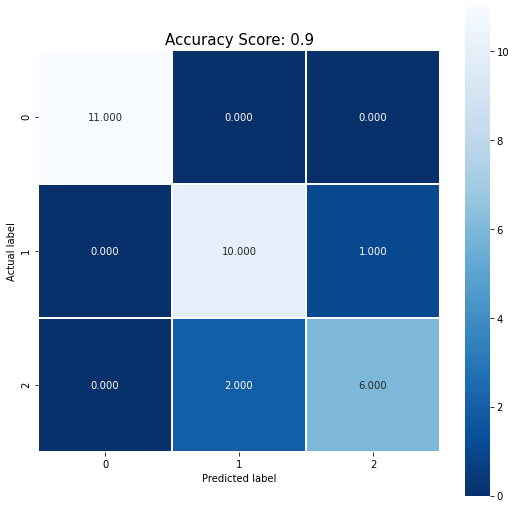

In [442]:
# visualize the accuracy of the model

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
